### MODUL III: EKUALISASI DAN SPESIFIKASI HISTOGRAM

#### Import Library
Baris code di bawah ini digunakan untuk menginpor fungsi-fungsi yang akan digunakan dengan perincian
- matplotlib.pyplot digunakan untuk membuat grafik sederhana 2d.
- numpy digunakan untuk membantu dalam membaca gambar ke dalam bentuk array.
- cv2 atau OpenCV berfungsi untuk melakukan konversi color space.
- math digunakan untuk melakukan operasi-operasi matematika.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import math

#### Deklarasi dan Inisialisasi Citra
Fungsi imread digunakan untuk membaca suatu data citra dari file yang mana dalam code ini, kedua file citra yang akan digunakan masing-masing disimpan ke dalam variabel img1

In [2]:
img1 = plt.imread ("marc.jpg")

#### Mengubah Citra ke dalam Grayscale
Perintah di bawah ini digunakan untuk mengubah citra berwarna ke dalam grayscale.Fungsi cvtColor digunakan untuk mengubah gambar ke dalam warna yang diinginkan. 
- Pertama, fungsi akan menerima citra asli yang ditunjukkan oleh image
- Kedua, fungsi akan mengonversikan citra ke dalam bentuk yang diingikan dalam hal ini digunakan cv.COLOR_BGR2GRAY
- Ketiga, hasil color space conversion disimpan ke dalam variable grayimg1

In [3]:
grayimg1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)

#### Menampilkan Hasil Citra Asli dengan Citra Grayscale
Fungsi display() digunakan untuk menampilkan hasil pengolahan citra. Hasil keluaran dari fungsi ini ialah perbandingan antara citra sebelum dan sesudah diolah. Untuk menampilkan dua citra sekaligus digunakan fungsi subplots dengan f,ax merujuk pada jumlah baris dan kolom yang diiginkan. Fungsi ini menggunakan parameter result yang merupakan hasil dari citra yang telah diolah.
Dalam baris perintah ini digunakan library matplotlib, maka harus digunakan colormap (cmap).Apabila tidak menggunakan cmap, maka secara default akan dihasilkan citra dengan warna yang berbeda dari yang telah diolah sebelumnya

In [4]:
def display(image1,image2):
    f, ax = plt.subplots(1,2)
    #membuat subplots dengan 1 baris dan 2 kolom
    ax[0].imshow(image1) 
    #grayscale image
    ax[0].set_title("Citra Asli")
    
    ax[1].imshow(image2, cmap = 'gray') 
    ax[1].set_title("Citra Grayscale")
    #final operation image
    plt.show()

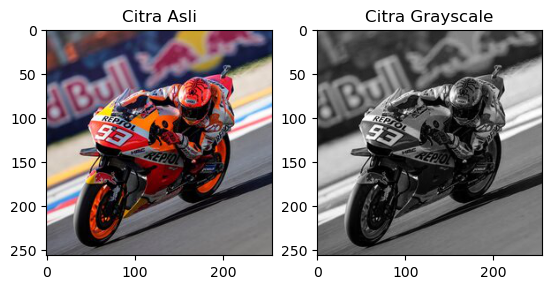

In [5]:
display(img1,grayimg1)

## SOAL 1: 
Tampilkan Histogram dari Citra 1

#### Mendapatkan Intensitas pada Tiap Piksel
Fungsi getIntensity() digunakan untuk mendapatkan intesitas dari tiap piksel pada citra 1 yang telah diubah ke dalam grayscale. Pada fungsi ini digunakan parameter, yakni citra yang akan dihitung intensitas pikselnya. Apabila diamati setiap nilai pixel akan dimasukkan ke dalam variabel histogram dan apabila ditemui nilai pixel yang sama lagi maka akan ditambahkan satu
- ex: pada array img[0][0] == 0 maka indeks variabel histogram akan menjadi histogram[0]

In [6]:
def getIntensity(img):
    histogram = np.zeros(256).astype(int)
    #membuat array berisikan 0 dengan besaran 256 dan menampung tipe data integer
    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            histogram[img[i,j]] += 1
    return histogram

In [7]:
histogram = np.zeros(256).astype(int)
xhistogram = [i for i in range (256)]
    #membuat array berisikan 0 dengan besaran 256 dan menampung tipe data integer
for i in range (grayimg1.shape[0]):
    for j in range (grayimg1.shape[1]):
        val = grayimg1[i][j]
        histogram[val] += 1

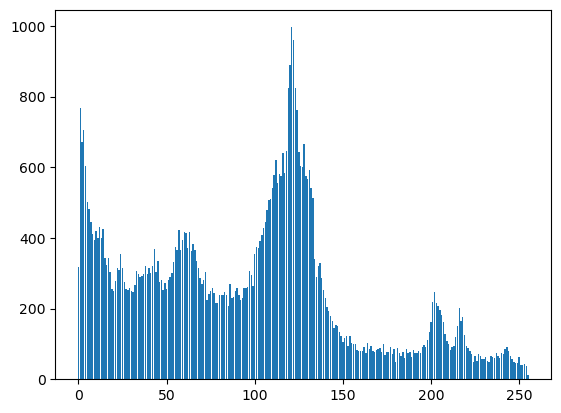

In [8]:
plt.bar(xhistogram,histogram)
plt.show()


#### Membuat Histogram Citra
Fungsi histogram() digunakan untuk membuat histogram hasil perhitungan tiap pixel dengan intensitasnya. Pada fungsi ini digunakan parameter dengan variabel image yang menunjukkan citra yang akan dibuat histogramnya berserta variabel text yang akan digunakan sebagi judul dari histogram. Sebelum proses pembuatan histogram, terlebih dahulu akan dipanggil fungsi getIntensity yang akan digunakan pada sumbu y

In [9]:
def histogram(image,text):
    yhistogram = getIntensity(image)
    #memasukkan nilai dari jumlah pixel ke dalam variabel yhistogram
    xhistogram = [i for i in range (256)]
    #memasukkan nilai dari 0-255 dengan menggunakan perulangan
    c = ['aquamarine','turquoise','lightseagreen','mediumturquoise']
    #memasukkan warna yang akan digunakan dalam menampikan grafik bar
    plt.bar(xhistogram,yhistogram, color = c)
    #membuat bar diagram yang mana pada x axis akan diisi oleh nilai dari variable xhistogram
    #y axis akan diisi oleh nilai dari variabel yhsitogram
    # dan warna yang akan ditampilkan berasaln dari warna-warna yang telah disimpan di dalam variabel c
    plt.title (text)
    #menampilkan judul dari diagram
    plt.xlabel ("Grayscale Level")
    #memberikan penamaan untuk x axis
    plt.ylabel ("Intesity Frequency")
    #memberikan penamaan untuk y axis
    plt.show

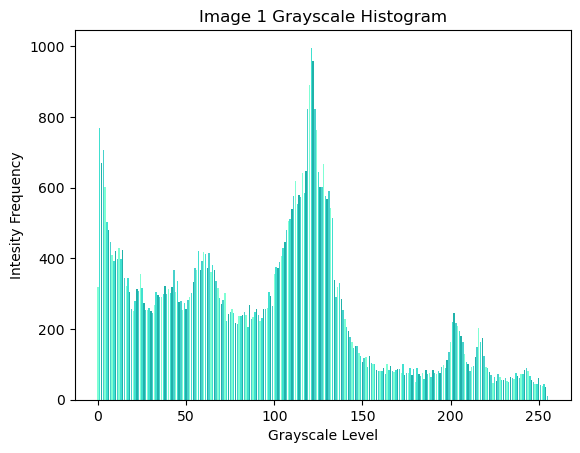

In [10]:
text = "Image 1 Grayscale Histogram"
histogram(grayimg1,text)

## SOAL 2
Lakukan ekualisasi histogram pada citra 1 dan tampilkan citra hasil ekualisasinya

#### Algoritma:
1. Cari intensitas tiap piksel
2. Lakukan perhitungan probabilitas dengan membagi intensitas piksel dengan total dari keseluhan intensitas
3. Perhitungan kumulatif
4. Mengalikan perhitungan kumulatif dengan derajat keabuan terbesar lalu dibulatkan.

#### Mencari Probabilitas Kemunculan tiap Pixel
Fungsi probability() digunakan untuk mencari probabilitas kemuncunlan tiap pixel di dalam citra dengan parameter adalah citra yang akan dihitung. Pada fungsi ini akan dipanggil terlebih dahulu intensitas tiap pixel dengan fungsi getIntensity(). Berikutnya tiap intensitas akan dibagi dengan total intensitas keseluruhan. Nilai hasil disimpan ke dalam variabel probs.

In [11]:
#finding the probability of each occurance
def probability(image):
    normalHist = getIntensity(image)
    #the intensity of each pixel, performed in 1d array
    probs = np.zeros(256,dtype = float)
    #probs berisikan 0 (np.zeros) dengan panjang 256 dan menampung tipe data float
    for i in range (len(normalHist)):
        probs[i] = normalHist[i]/sum(normalHist)
    return probs

#### Mencari Nilai Kumulatif dari Nilai Probabilitas
Fungsi cumulative() digunakan untuk mencari nilai hasil penjumlahan probabilitas suatu indeks dengan indeks sebelumnya.

In [12]:
def cumulative(image):
    probs = probability(image)
    #mencari probabilitas kemunculan pixel dengan memanggil fungsi probability
    cumulative = np.zeros(256,dtype = float)
    for i in range (len(cumulative)):
        if i == 0:
            #apabila indeks pada 0 maka tidak dilakukan penjumlahan kumulatif sehingga nilai tetap
            cumulative[i] = probs[i]
        else:
            cumulative[i] = probs[i] + cumulative[i-1]
            #apabila indeks lebih dari 0 maka akan dilakukan penjumlahan nilai probabilitas pada indeks yang ditunjuk
            #dengan probabilitas pada indeks-1
    return cumulative

#### Mengalikan Nilai Kumulatif dengan Level Keabuan Tertinggi
Fungsi rounding() digunakan dengan mengalikan nilai tiap perhitungan kumulatif yang telah dilakukan pada fungsi cumulative() dengan nilai keabuan tertinggi yang dalam hal ini adalah 255. Setelah dilakukan proses perkalian, berikutnya akan dilakukan pembulatan ke atas menggunakan fungsi ceil pada library math.

In [13]:
def rounding(image):
    cumulative_res = cumulative(image)
    rounded = np.zeros(256,dtype = int)
    #variabel rounded digunakan untuk menyimpan hasil pembulatan dan hanya dapat menampung tipe data integer
    for i in range (len(rounded)):
        rounded[i] = math.ceil(cumulative_res[i]*255)
    return rounded

#### Remapping Hasil Ekualisasi
Fungsi remapp() digunakan untuk melakukan pemetaan kembali hasil ekualisasi ke dalam citra. Fungsi ini menggunakan 2 parameter, yaitu result yang merupakan array hasil perhitungan baik spesifikasi maupun ekualisasi dan img yang merupakan citra yang digunakan dalam pemetaan hasil perhitungan. Dalam fungsi ini, nilai piksel pada citra img akan digantikan nilainya dengan nilai pada variabel rounded dengan indeks sesuai nilai piksel yang ditunjuk.

- ex: grayimg[0][0] = 1 maka rounded[1]
- Beriktunya variabel final[i][j] akan diisi dengan nilai dari variabel rounded pada indeks ke-1

In [14]:
#re-mapping the equalized result 
def remapp(result,img):
    final   = np.zeros(((img.shape[0]),(img.shape[1])),dtype=int)
    for i in range(final.shape[0]):
        for j in range (final.shape[1]):
            final[i,j] = result[img[i,j]]
    return final

In [15]:
result_eq = rounding(grayimg1)
result_eq = remapp(result_eq,grayimg1)

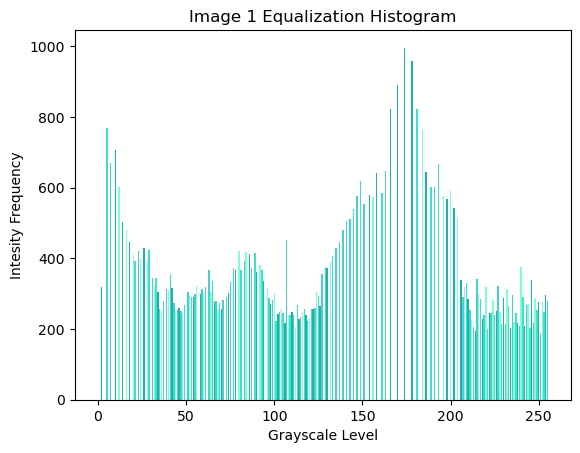

In [16]:
text = "Image 1 Equalization Histogram"
histogram(result_eq,text)

Apabila histogram citra 1 sebelum ekualisasi dibandingkan dengan setelah ekualisasi maka akan didapati perbedaan antara lain:
- Histogram setelah ekualisasi memiliki intensitas tinggi pada wilayah kanan (cenderung cerah).
- Pendistribusian intensitas setiap piksel lebih merata.
- Pada  piksel tertentu tidak ditemukan grafik bar. Hal ini menunjukkan kemungkinan intensitas piksel hasil ekualisasi citra bernilai 0.

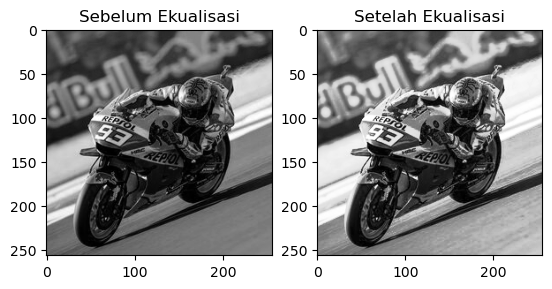

In [17]:
#menampilkan citra sebelum dan sesudah ekualisasi

f, ax = plt.subplots(1,2)
#membuat subplots dengan 1 baris dan 2 kolom

ax[0].imshow(grayimg1, cmap = 'gray') 
ax[0].set_title("Sebelum Ekualisasi")

ax[1].imshow(result_eq, cmap = 'gray') 
ax[1].set_title("Setelah Ekualisasi")

plt.show()

## Soal 3
Lakukan spesifikasi/matching histogram pada citra 1 berdasarkan pada histogram citra 2. 

#### Algoritma:
1. Ekualisasi Citra Asal dan Citra Referensi
2. Pemetaan

#### Deklarasi dan Inisialisasi Citra
Fungsi imread digunakan untuk membaca suatu data citra dari file yang mana dalam code ini, kedua file citra yang akan digunakan masing-masing disimpan ke dalam variabel img2. Variabel img2 nantinya akan idgunakan sebagai citra target dalam melakukan spesifikasi.

In [18]:
img2 = plt.imread ("haechan.jpg")

#### Mengubah Citra ke dalam Grayscale
Perintah di bawah ini digunakan untuk mengubah citra berwarna ke dalam grayscale.Fungsi cvtColor digunakan untuk mengubah gambar ke dalam warna yang diinginkan. 
- Pertama, fungsi akan menerima citra asli yang ditunjukkan oleh image
- Kedua, fungsi akan mengonversikan citra ke dalam bentuk yang diingikan dalam hal ini digunakan cv.COLOR_BGR2GRAY
- Ketiga, hasil color space conversion disimpan ke dalam variable grayimg2

In [19]:
grayimg2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

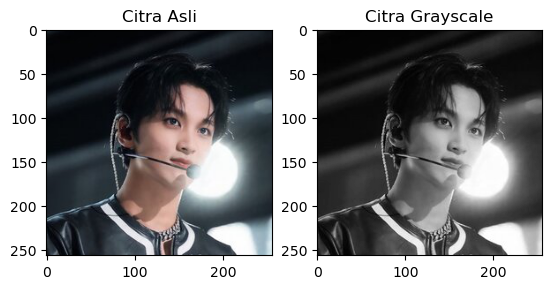

In [20]:
#memanggil fungsi display untuk menampikan citra asli dan citra grayscale
display(img2,grayimg2)

#### Melakukan Ekualisasi pada Citra Asal dan Citra Target
Tahapan pertama sebelum melakukan spesifikasi adalah melakukan ekualisasi pada citra asal dan citra tujuan. Proses ekualisasi tidak dilakukan sampai pada tahap remapping hasil ekualisasi melainkan cukup sampai tahap membulatkan hasil perkalian level keabuan tertinggi dengan hasil penjumlahan kumulatif tiap pixel. Oleh karena itu, pada baris perintah di bawah ini hanya dilakukan pemanggilan fungsi rounding saja.

In [21]:
source = rounding(grayimg1)
#variabel source menampung hasil ekualisasi citra asal

target = rounding(grayimg2)
#variabel source menampung hasil ekualisasi citra tujuan

#### Final Mapping 
Fungsi finalMapping() digunakan untuk melakukan pemetaan pada proses spesifikasi. Pada fungsi ini, nilai piksel dari citra asal akan dikurangi dengan tiap nilai intensitas dari citra target untuk mencari nilai terdekat dan ditampung ke variabel temp. Pengurangan ini akan dilakukan sampai indeks terakhir pada citra asal. Setiap perulangan, nilai dari variabe temp akan dibandingkan dengan nilai dari variabel minval. Apabila temp lebih kecil dari minval maka nilai minval akan berganti dengan nilai dari temp begitu juga minj j yang akan diisi dengan nilai j dikurangi 1. Jika perulangan telah selesai, nilai variabel final pada indeks ke-i akan diisi dengan nilai dari minj

In [22]:
def finalMapping(source,target):
    final  = np.zeros(256,dtype = int)
    for i in range (len(source)):
        minval = abs(source[i]-target[0])
        #menggunakan fungsi abs untuk menghindari hasil pengurangan berupa negatif
        minj   = 0
        for j in range (len(target)):
            temp = abs(source[i]-target[j])
            if temp<minval:
                minval = temp
                minj   = j-1
        final[i] = minj
    return final

In [23]:
result_sp = finalMapping(source,target)
#melakukan spesifikasi

result_sp = remapp(result_sp,grayimg1)
#melakukan remapping hasil spesifikasi pada citra asal

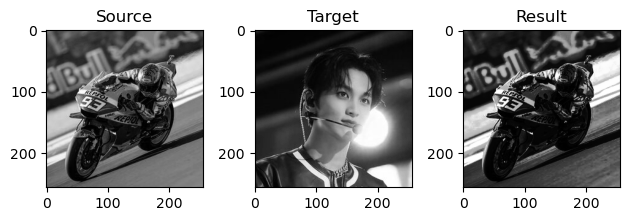

In [24]:
#menampilkan cita asal,citra target, dan citra hasil spesifikasi
f, ax = plt.subplots(1,3)
ax[0].imshow(grayimg1, cmap = 'gray') 
ax[0].set_title("Source")

ax[1].imshow(grayimg2, cmap = 'gray') 
ax[1].set_title("Target")

ax[2].imshow(result_sp, cmap = 'gray') 
ax[2].set_title("Result")

plt.tight_layout()
#mengatur jarak antar grid agar tidak saling menunmpuk

plt.show()

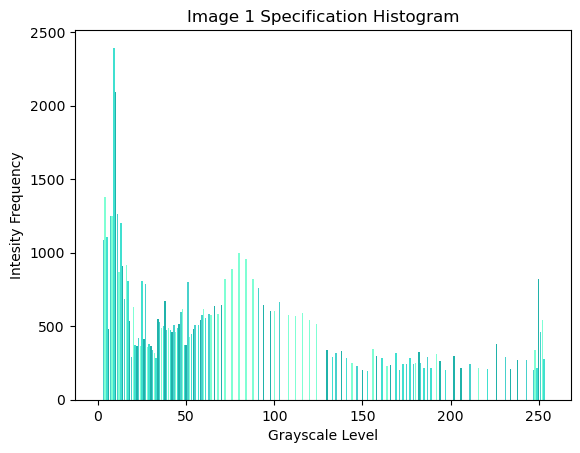

In [25]:
text = "Image 1 Specification Histogram"
histogram(result_sp,text)